# Tutorial Geomagnetic Field Inversions
This is a tutorial for using the Geomagnetic Field Inversions code written by Frenk Out, Liz van Grinsven, Monika Korte, and Lennart de Groot. This tutorial will guide you through the following process:
1. Loading and Fitting data
2. Starting the model
    1. Initiating a FieldInversion class and add data
    2. Run a time-dependent standard iterative inversion
    3. Plotting results
3. Sweeping through models to find optimal damping parameters (optional)
4. Starting a model for one timestep (optional)
5. Loading data in a Korte et al. format (optional)

### 0. Loading libraries
This tutorial requires, besides geomagnetic_field_inversions, numpy, pandas, pathlib, matplotlib, and cartopy. The geomagnetic_field_inversions code consists of three files:
1. StationData is a class that prepares geomagnetic field data to be inputted in FieldInversion later.
2. FieldInversion is the main class where all calculations happen.
3. plot_tools is a plotting module that helps to create frequently used plots in a easy way.

In [1]:
import numpy as np
# Necessary for loading excel or csv files
import pandas as pd
# Necessary for correct path handling
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
# Cartopy is only required for plotting world maps
import cartopy.crs as ccrs

# Our code
from geomagnetic_field_inversions import plot_tools, StationData, FieldInversion

## 1. Loading and Fitting data
#### Set-up
We will now proceed to loading and fitting the data. This is required to run the inversion later. The basic input for adding and fitting the data is latitude (between -90 and 90 degrees) and longitude (between -180 and 180 degrees) of each sample location. After the class is initiated, data can be added. This data can be inclination (degrees), declination (degrees), or intensity data (nT), but also X (nT), Y (nT), Z (nT), or H (nT) magnetic data.

In [2]:
# Set a path to load and save files
# path should be like: .../geomagnetic_field_inversions/doc
path = Path().absolute()
# location of our 'mock' dataset
excel = pd.ExcelFile(path / 'first run_reversetime.xlsx')
# the latitude and longitude of out 6 stations in degrees
lat = [0.1, 35.0, 8.0, 35.9, 5.0, 60.7]
lon = [336.7-360, 140.0, 121.0, 243.0-360, 73.0, 336.6-360]

#### *StationData and add_data*
Now that we have set the groundwork, we can proceed to adding and fitting the individual datasets. All data belonging to the same location can be added to the same class. First we initiate a class for the station using its latitude and longitude. After that, we add data belonging to that station separately (from the spreadsheet) add expected error and finally fit a line through it.

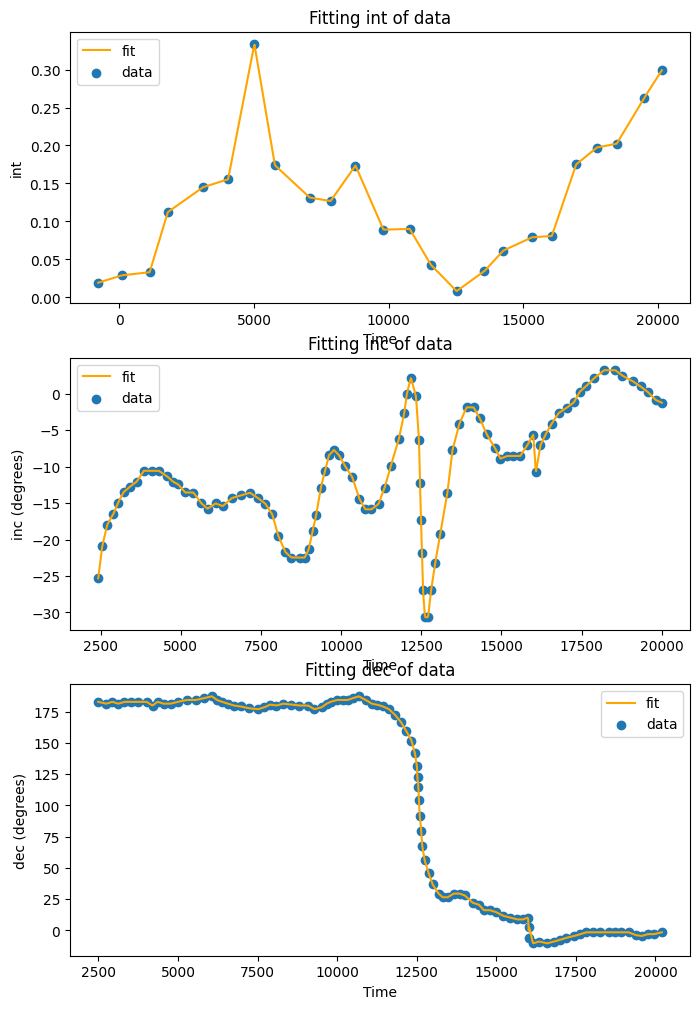

In [3]:
# Start by initializing a new class using latitude and longitude of the station
oda_2000 = StationData(lat[2], lon[2])

# We inputted time as kiloyears, so our timefactor is 1000
oda_2000.add_data('int', (pd.read_excel(excel, 'Oda_2000').iloc[:, [4, 5]].dropna().T.values.tolist()), 1000, error=[1])
oda_2000.add_data('inc', (pd.read_excel(excel, 'Oda_2000').iloc[:, [0, 1]].dropna().T.values.tolist()), 1000, error=[np.radians(1)])
oda_2000.add_data('dec', (pd.read_excel(excel, 'Oda_2000').iloc[:, [2, 3]].dropna().T.values.tolist()), 1000, error=[np.radians(1)])

# The fitting method fits a line through the data points
# Since we specified output, we we will see the resulting graphs
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
oda_2000.fitting()
plot_tools.plot_station(axes, oda_2000)
plt.show()

We are not really happy with the way the intensity is fitted, so we decide to use a different interpolation algorithm for that: e.g. polyfit or univariatespline

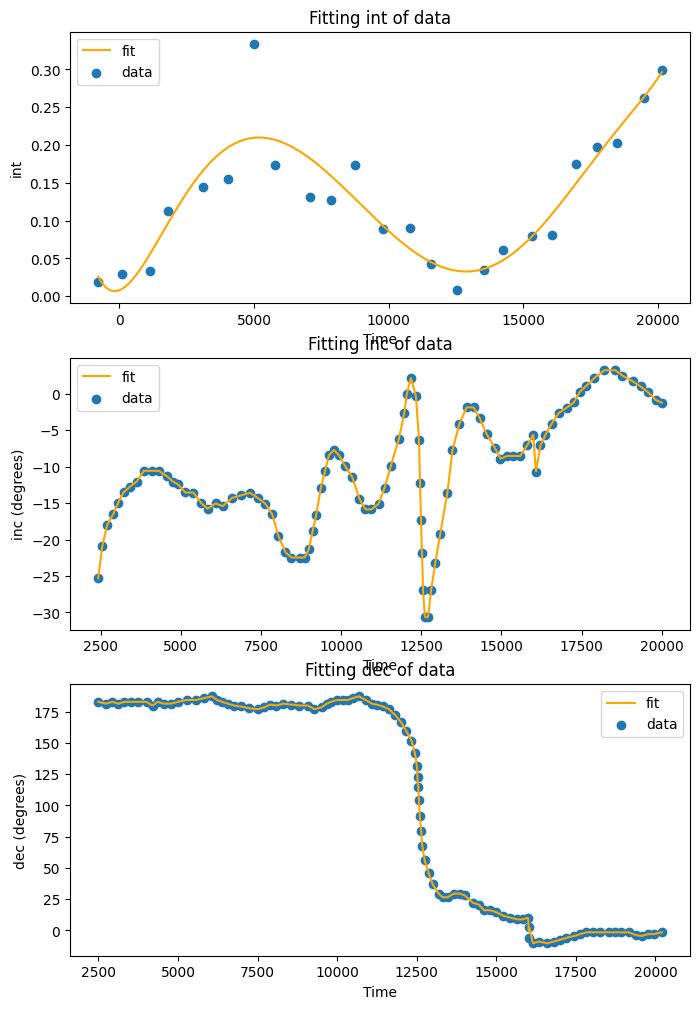

In [4]:
oda_2000.fitting(ttype='int', order=8, method='polyfit')
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
plot_tools.plot_station(axes, oda_2000)
plt.show()

In [5]:
# Now we fit the rest, but do not show the output
# By calling plot_tools.plot_station like above you can observe the plots
valet_1989 = StationData(lat[0], lon[0])
valet_1989.add_data('int', (pd.read_excel(excel, 'Valet_1989').iloc[:, [4, 5]].dropna().T.values.tolist()), 1000, error=[0.01])
valet_1989.add_data('inc', (pd.read_excel(excel, 'Valet_1989').iloc[:, [0, 1]].dropna().T.values.tolist()), 1000, error=[np.radians(1)])
valet_1989.add_data('dec', (pd.read_excel(excel, 'Valet_1989').iloc[:, [2, 3]].dropna().T.values.tolist()), 1000, error=[np.radians(1)])
valet_1989.fitting('int', order=10, method='polyfit')
valet_1989.fitting('inc', order=10, method='polyfit')
valet_1989.fitting('dec', order=10, method='polyfit')

haneda_2020 = StationData(lat[1], lon[1])
haneda_2020.add_data('int', (pd.read_excel(excel, 'Haneda_2020').iloc[:, [4, 5]].dropna().T.values.tolist()), 1000, error=[0.01])
haneda_2020.add_data('inc', (pd.read_excel(excel, 'Haneda_2020').iloc[:, [0, 1]].dropna().T.values.tolist()), 1000, error=[np.radians(1)])
haneda_2020.add_data('dec', (pd.read_excel(excel, 'Haneda_2020').iloc[:, [2, 3]].dropna().T.values.tolist()), 1000, error=[np.radians(1)])
haneda_2020.fitting('int', order=10, method='polyfit')
haneda_2020.fitting('inc', order=10, method='polyfit')
haneda_2020.fitting('dec', order=10, method='polyfit')

valet_1988 = StationData(lat[3], lon[3])
valet_1988.add_data('int', (pd.read_excel(excel, 'Valet_1988').iloc[:, [4, 5]].dropna().T.values.tolist()), 1000, error=[0.01])
valet_1988.add_data('inc', (pd.read_excel(excel, 'Valet_1988').iloc[:, [0, 1]].dropna().T.values.tolist()), 1000, error=[np.radians(1)])
valet_1988.add_data('dec', (pd.read_excel(excel, 'Valet_1988').iloc[:, [2, 3]].dropna().T.values.tolist()), 1000, error=[np.radians(1)])
valet_1988.fitting('int', order=3, smoothing=0.02, method='USpline')
valet_1988.fitting('inc', order=14, method='polyfit')
valet_1988.fitting('dec', order=10, method='polyfit')

valet_2014 = StationData(lat[4], lon[4])
valet_2014.add_data('int', (pd.read_excel(excel, 'Valet_2014').iloc[:, [4, 5]].dropna().T.values.tolist()), 1000, error=[0.01])
valet_2014.add_data('inc', (pd.read_excel(excel, 'Valet_2014').iloc[:, [0, 1]].dropna().T.values.tolist()), 1000, error=[np.radians(1)])
valet_2014.add_data('dec', (pd.read_excel(excel, 'Valet_2014').iloc[:, [2, 3]].dropna().T.values.tolist()), 1000, error=[np.radians(1)])
valet_2014.fitting('int', order=8, method='polyfit')
valet_2014.fitting('inc', order=8, method='polyfit')
valet_2014.fitting('dec', order=5, method='polyfit')

channell_2000 = StationData(lat[5], lon[5])
channell_2000.add_data('int', (pd.read_excel(excel, 'Channell_2000').iloc[:, [4, 5]].dropna().T.values.tolist()), 1000, error=[0.01])
channell_2000.add_data('inc', (pd.read_excel(excel, 'Channell_2000').iloc[:, [0, 1]].dropna().T.values.tolist()), 1000, error=[np.radians(1)])
channell_2000.add_data('dec', (pd.read_excel(excel, 'Channell_2000').iloc[:, [2, 3]].dropna().T.values.tolist()), 1000, error=[np.radians(1)])
channell_2000.fitting('int', order=15, method='polyfit')
channell_2000.fitting('dec', order=10, method='polyfit')
channell_2000.fitting('inc', order=10, method='polyfit')

Our data is now ready to be used in the next step
- Note: be sure to respect the boundaries for latitude and longitude values

## 2. Starting the model
### 2. Initiate a FieldInversion class and add data
#### *FieldInversion*
The `FieldInversion`-class is the 'location' where we will perform all calculations. We start a FieldInversion class by calling
- `MyInstance = FieldInversion(time_array=np.linspace(3000, 17000, 141), maxdegree=3, verbose=True)` 

The time_array contains the timesteps over which we want to invert our data; we set our maximum spherical degree to 3; the verbosity flag helps us to understand what is going on in the code.

More parameters can be changed, but we will not do that for now.

&rarr; For more info about other parameters of this class, type:
`FieldInversion?`

In [53]:
# input modeled time array; from 3000 to 17000 with steps of 100 yr
test_inv = FieldInversion(time_array = np.linspace(3000, 17000, 141), maxdegree=1, verbose=True)

#### *add_data*
After we have initiated the `FieldInversion`-class, we add our data by simply calling the `add_data`-method and adding the fitted classes from the previous step. All data errors are linearly interpolated as default option.

In [54]:
test_inv.add_data(valet_1989)
test_inv.add_data(haneda_2020)
test_inv.add_data(oda_2000)
test_inv.add_data(valet_1988)
test_inv.add_data(valet_2014)
test_inv.add_data(channell_2000)

Adding int-type
Adding inc-type
Adding dec-type
Coordinates are geodetic, translating to geocentric coordinates.
Data of station is added to class
Adding int-type
Adding inc-type
Adding dec-type
Coordinates are geodetic, translating to geocentric coordinates.
Data of station is added to class
Adding int-type
Adding inc-type
Adding dec-type
Coordinates are geodetic, translating to geocentric coordinates.
Data of station is added to class
Adding int-type
Adding inc-type
Adding dec-type
Coordinates are geodetic, translating to geocentric coordinates.
Data of station is added to class
Adding int-type
Adding inc-type
Adding dec-type
Coordinates are geodetic, translating to geocentric coordinates.
Data of station is added to class
Adding int-type
Adding inc-type
Adding dec-type
Coordinates are geodetic, translating to geocentric coordinates.
Data of station is added to class


The output tells us that the different datatypes are successfully added to the `FieldInversion`-class. Additionally, the coordinates of the sample stations are translated into a geocentric reference frame, since they are given in a geodetic reference frame.

### B. Run a time-dependent standard iterative inversion
After we have set up the class, we can proceed to the geomagnetic field inversion.
#### *prepare_inversion*
First we have to prepare all matrices before execution. For that purpose we need two parameters:
- spatial_dict: a dictionary containing all parameters for spatial damping
- temporal_dict: a dictionary containing all parameters for temporal damping

Spatial damping enforces that higher order Gauss coefficients do not become too large, while temporal damping enforces a smoothness condition on the individual Gauss coefficients through time.

We will use 'Gubbins'-like (constrain by Ohmic heating) spatial damping with a damping factor of 1e-6. For the temporal damping we will use 'Br2cmb' (minimizes the magnetic field flux through the core-mantle boundary) with a damping factor of 1e15. For more info on the implemented damping types, please have a look at `damping_modules/damp_types.py`.

For illustrative purposes, we ahve set the damping factors already. Normally you would have to investigate which combination of damping parameters is best (see section 3). The higher the damping factor, the smoother your model parameters becomes, but the higher the data residual will be.

In [71]:
temp_dict = {"df": 5e13, "damp_type": 'Br2cmb', "ddt": 2, "damp_dipole": True}
test_inv.prepare_inversion(temp_dict=temp_dict)

Calculating Schmidt polynomials and Fréchet coefficients
Calculating spatial damping matrix
Calculating temporal damping matrix
Calculations finished


#### *run_inversion*
Now we have prepared everything for the inversion. We can now proceed to starting the iterative inversion by using the `run_inversion`-method. This method requires at least a starting model. We will use a starting model with where only $g_1^0$ has a value of -3.

we also set the maximum amount of iterations to 20, but always check whether the model converged sufficiently (see plot_residuals). Additionally, you can impose rejection criteria here by providing a numpy array to the `rej_crits`-parameter. This array should be at least 7 items long and contains, in order, the rejection criteria for magnetic X-data, Y-data, Z-data, H-data, intensity data, inclination data, and declination data. Here, we do not use rejection criteria.

In [74]:
# our starting model should be as long as the number of gaussian coefficients, i.e. 15.
x0 = np.zeros(3)
x0[0] = -3
test_inv.run_inversion(x0, max_iter=100)

Setting up starting model
Start iteration 1
Create forward and residual observations
Start formation time dependent matrices
Prepare and solve equations
Residual is 4033.40
Start iteration 2
Create forward and residual observations
Start formation time dependent matrices
Prepare and solve equations
Residual is 3781.21
Start iteration 3
Create forward and residual observations
Start formation time dependent matrices
Prepare and solve equations
Residual is 3009.75
Start iteration 4
Create forward and residual observations
Start formation time dependent matrices
Prepare and solve equations
Residual is 2934.46
Start iteration 5
Create forward and residual observations
Start formation time dependent matrices
Prepare and solve equations
Residual is 2487.13
Start iteration 6
Create forward and residual observations
Start formation time dependent matrices
Prepare and solve equations
Residual is 2904.60
Start iteration 7
Create forward and residual observations
Start formation time dependent ma

After each iteration, the rms residual is shown and how many datapoins are rejected. After 8 iterations the residual does not change much.

#### *save_spherical_coefficients*
We will now proceed to saving our final coefficients and residuals by inputting a path and name to save our files. This will create a *Tutorial_residual.csv*-file containing all residuals after each timestep. Additionally, we save the final Gauss coefficients of the final iteration, per timestep, unsplined. The gaussian coefficients are stored degree-wise, so: $g_1^0$, $g_1^1$, $h_1^1$, $g_2^0$, $g_2^1$, $h_2^1$, $g_2^2$, $h_2^2$, etc ...

In [10]:
test_inv.save_coefficients(path / 'output', file_name='Tutorial', save_residual=True)

### C. Plotting Results
After running the inversion, we will obtain plots of the results to investigate what is going on in our model. For that purpose, we will plot residuals, powerspectra, coefficients, and magnetic field values through time.

#### residuals plots
by calling `plot_tools.plot_residual` we can easily create a plot that shows the residuals of the various datatypes per iteration. The figure shows in this case that after 10 iterations the residual seems stable. However, declination and intensity still fluctuate a bit.

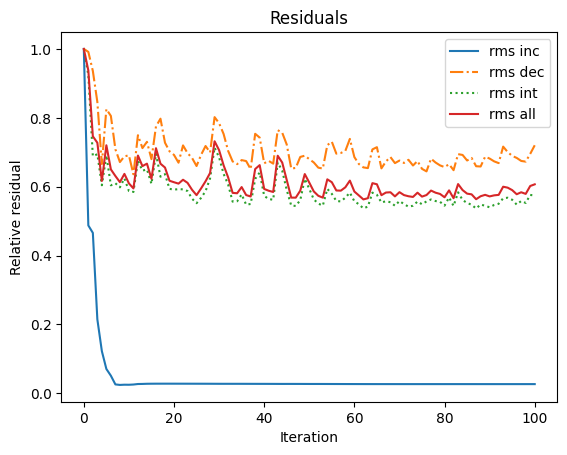

In [75]:
# We start by plotting the rms of various types per iteration
# start a figure
fig, ax = plt.subplots()
ax.set_title('Residuals')
ax.set_xlabel('Iteration')
ax.set_ylabel('Relative residual')
# make a call to the plotting library, input ax and our FieldInversion instance
ax = plot_tools.plot_residuals(ax, test_inv)
ax.legend(loc='upper right')
plt.show()

#### powerspectra
The `plot_tools.plot_spectrum` allows the plotting of the powerspectrum and secular variation of the gaussian coefficients. The default option is to plot the energy 'stored' in each degree. If the `cmb`-parameter is set to True, the two plots show the powerspectrum and secular variation at the core mantle boundary.

It is also possible to plot the powerspectrum and secular variation at a different time interval.

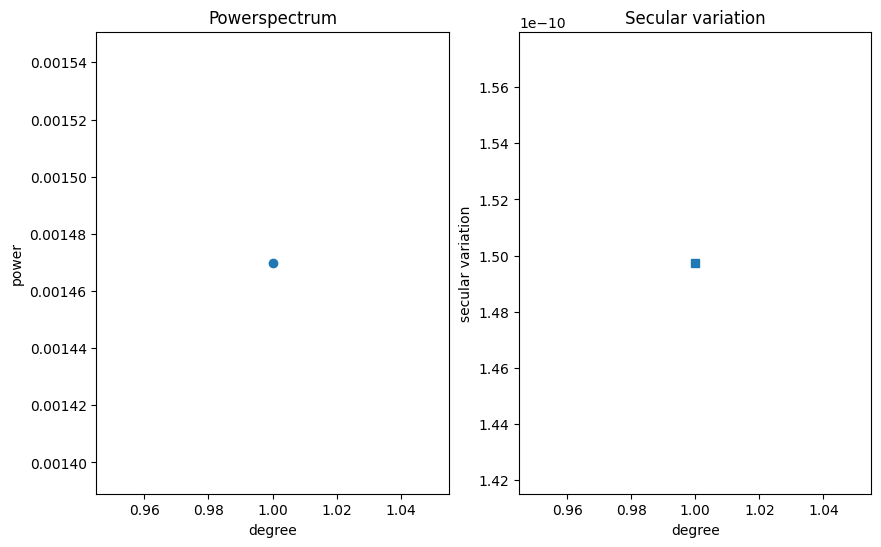

In [76]:
# start figure
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].set_title('Powerspectrum')
axes[0].set_xlabel('Spherical degree l')
axes[0].set_ylabel('Power')
axes[1].set_title('Secular variation')
axes[1].set_xlabel('Spherical degree l')
axes[1].set_ylabel('Secular variation')
# make a call to the plotting library
axes = plot_tools.plot_spectrum(axes, test_inv)
plt.show()

#### Gauss coefficients
By using `plot_tools.plot_coeff` we can plot the gaussian coefficients through time. It plots all gaussian coefficients of the same degree at once, but we could also decide to define yourself which coefficients to plot by setting `index` (see `plot_tools.plot_coeff`). It defaults to using the coefficients calculated in the last iteration, but we could choose otherwise by setting plot_iter to something else than -1.

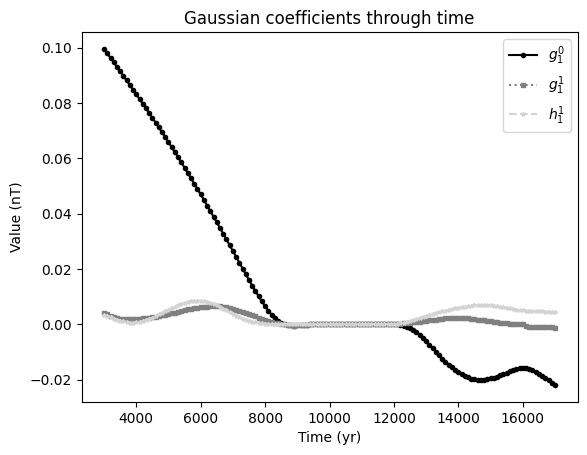

In [77]:
fig, ax = plt.subplots()
ax.set_title('Gaussian coefficients through time')
ax.set_xlabel('Time (yr)')
ax.set_ylabel('Value (nT)')
# we only want to plot gaussian coefficients of degree 1
ax = plot_tools.plot_coeff(ax, test_inv, degree=1)
ax.legend(loc='upper right')
plt.show()

#### compare model to data
After running the model, it would be helpful to see how well the data is fitted in our model. `plot_tools.compare_loc` was created for this purpose. By inputting the dataclass (see section 1), the fieldinversion class, and a matplotlib axis into this function we can observe the fit. (Red zones would correspond to rejected data; not visble now since we did not impose rejection criteria)

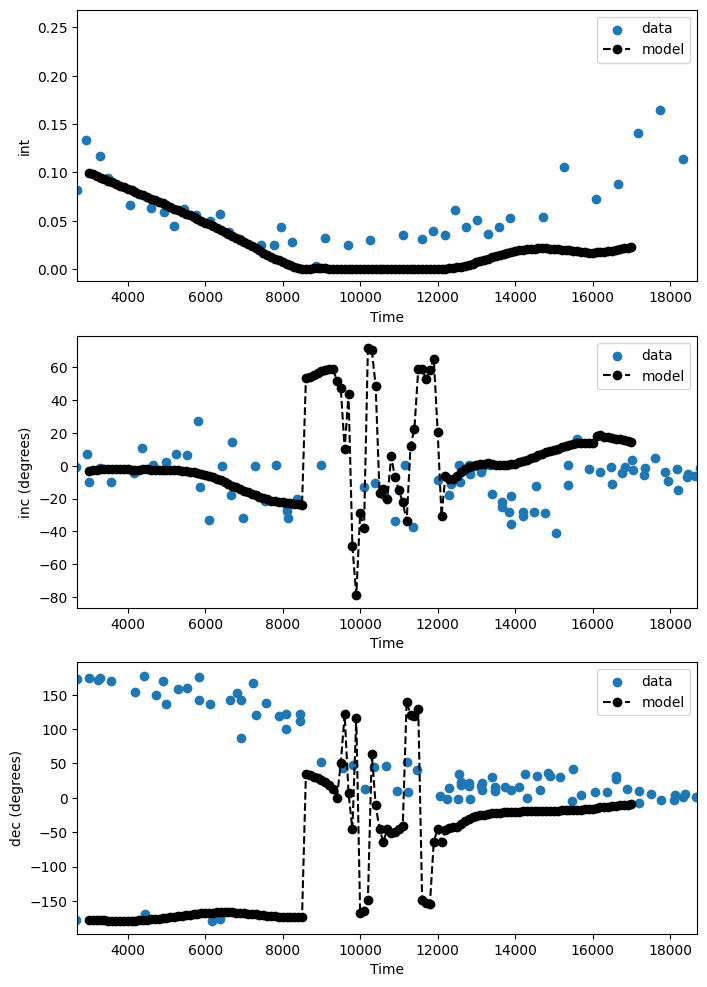

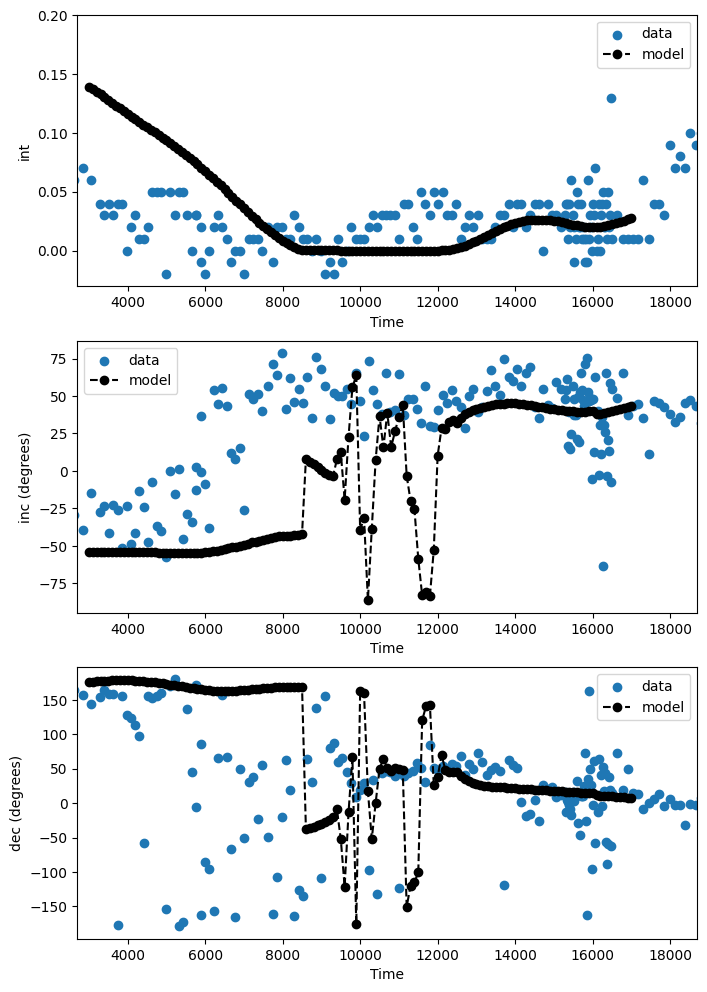

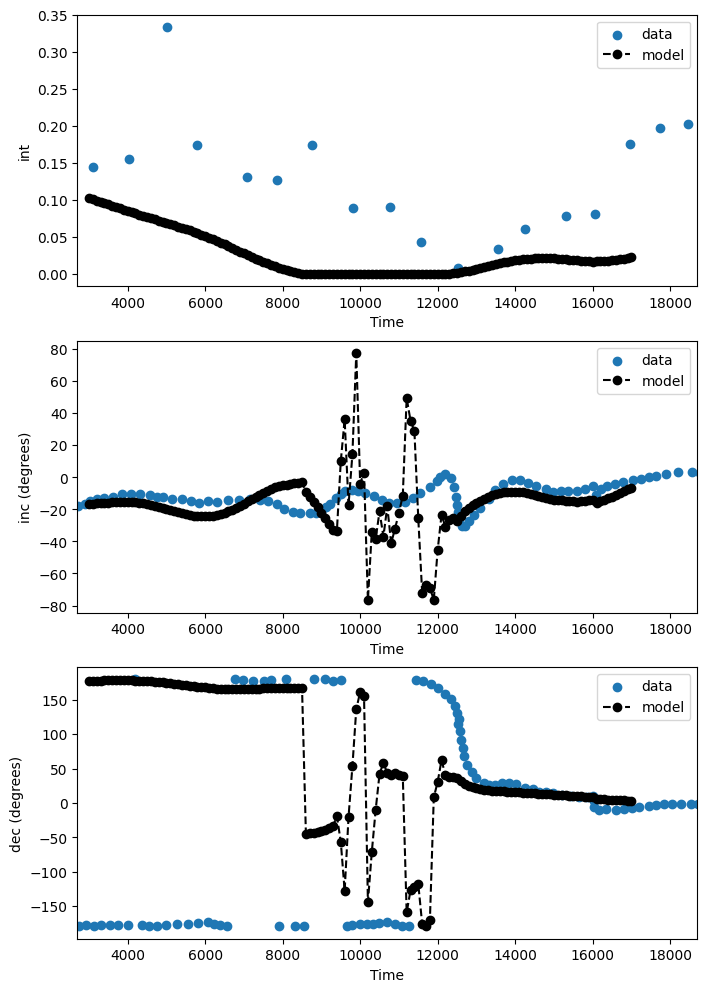

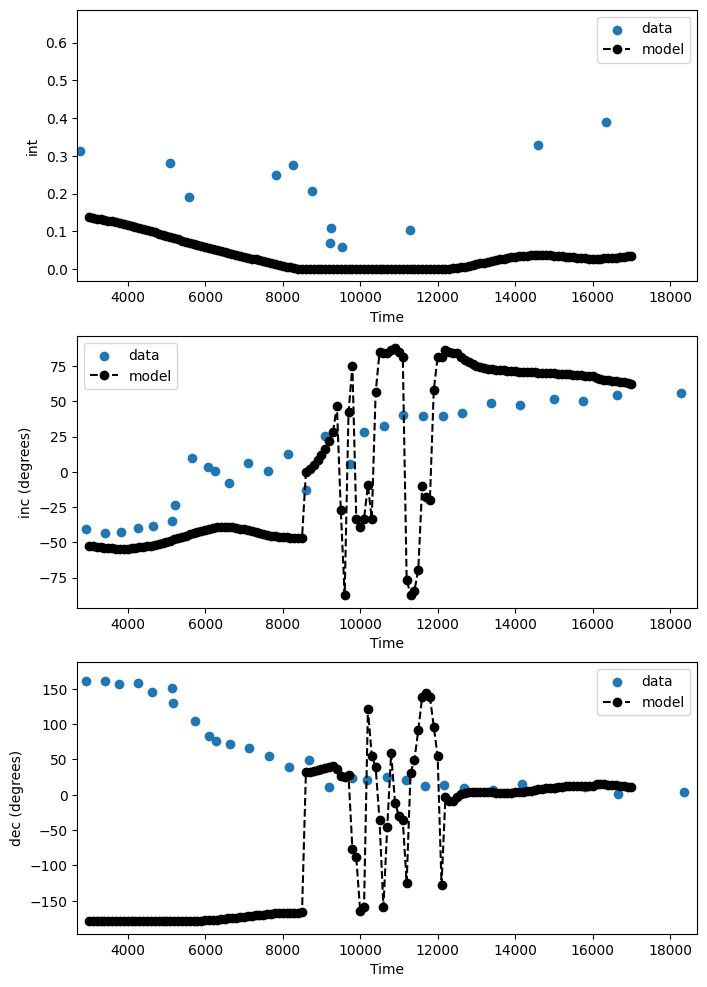

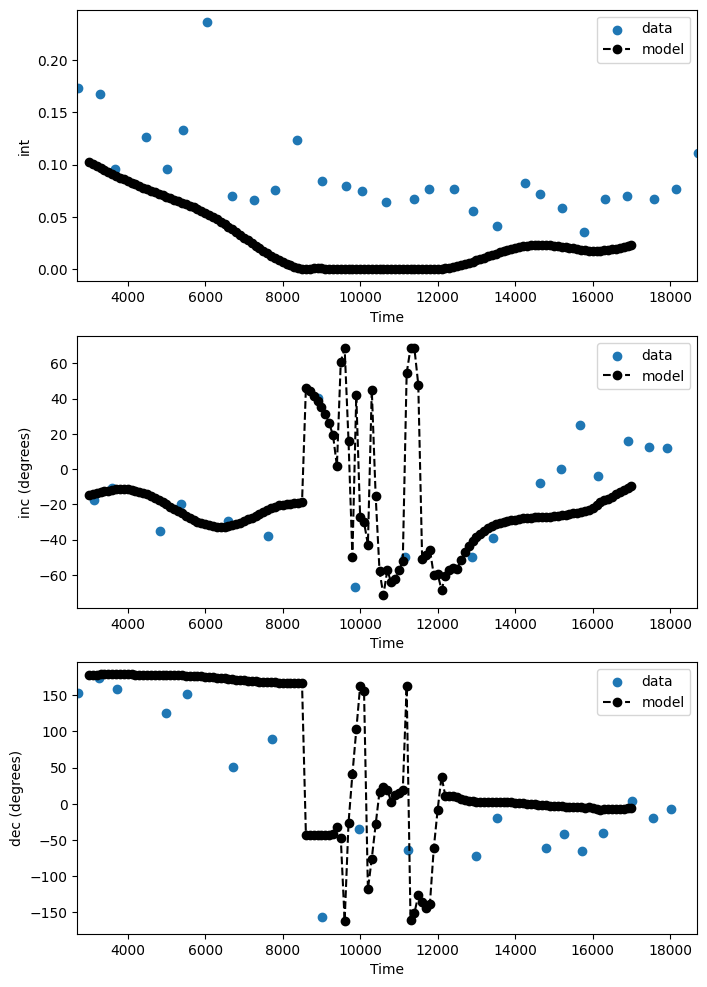

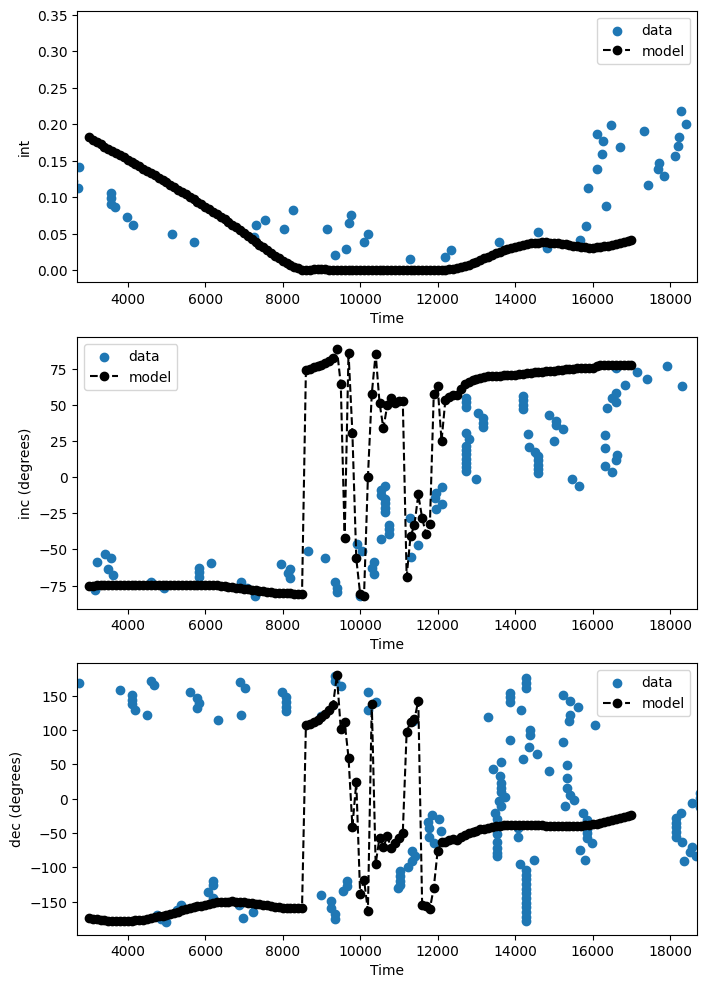

In [78]:
# write a loop to observe the fit for all stations
for sheet in [valet_1989, haneda_2020, oda_2000, valet_1988, valet_2014, channell_2000]:
    fig, axes = plt.subplots(len(sheet.types), 1, figsize=(8, 4*len(sheet.types)))
    axes = plot_tools.compare_loc(axes, test_inv, sheet)
    plt.show()

#### forward calculations
After calculation of the gaussian coefficients, we plot their effect on a worldmap and on one location. For the worldmap, we define 3 axes and choose a projection. We choose a time we want to plot and indicate if we want to plot the magnetic field at the cmb (`cmb=True`) or not (default).

/home/out/.cache/pypoetry/virtualenvs/geomagnetic-field-inversions-d_i98KR0-py3.9/lib/python3.9/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/out/.cache/pypoetry/virtualenvs/geomagnetic-field-inversions-d_i98KR0-py3.9/lib/python3.9/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/out/.cache/pypoetry/virtualenvs/geomagnetic-field-inversions-d_i98KR0-py3.9/lib/python3.9/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/out/.cache/pypoetry/virtualenvs/geomagnetic-field-inversions-d_i98KR0-py3.9/lib/python3.9/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/out/.cache/pypoetry/virtualenvs/geomagnetic-field-inversions-d_i98KR0-py3.9/lib/python3.9/site

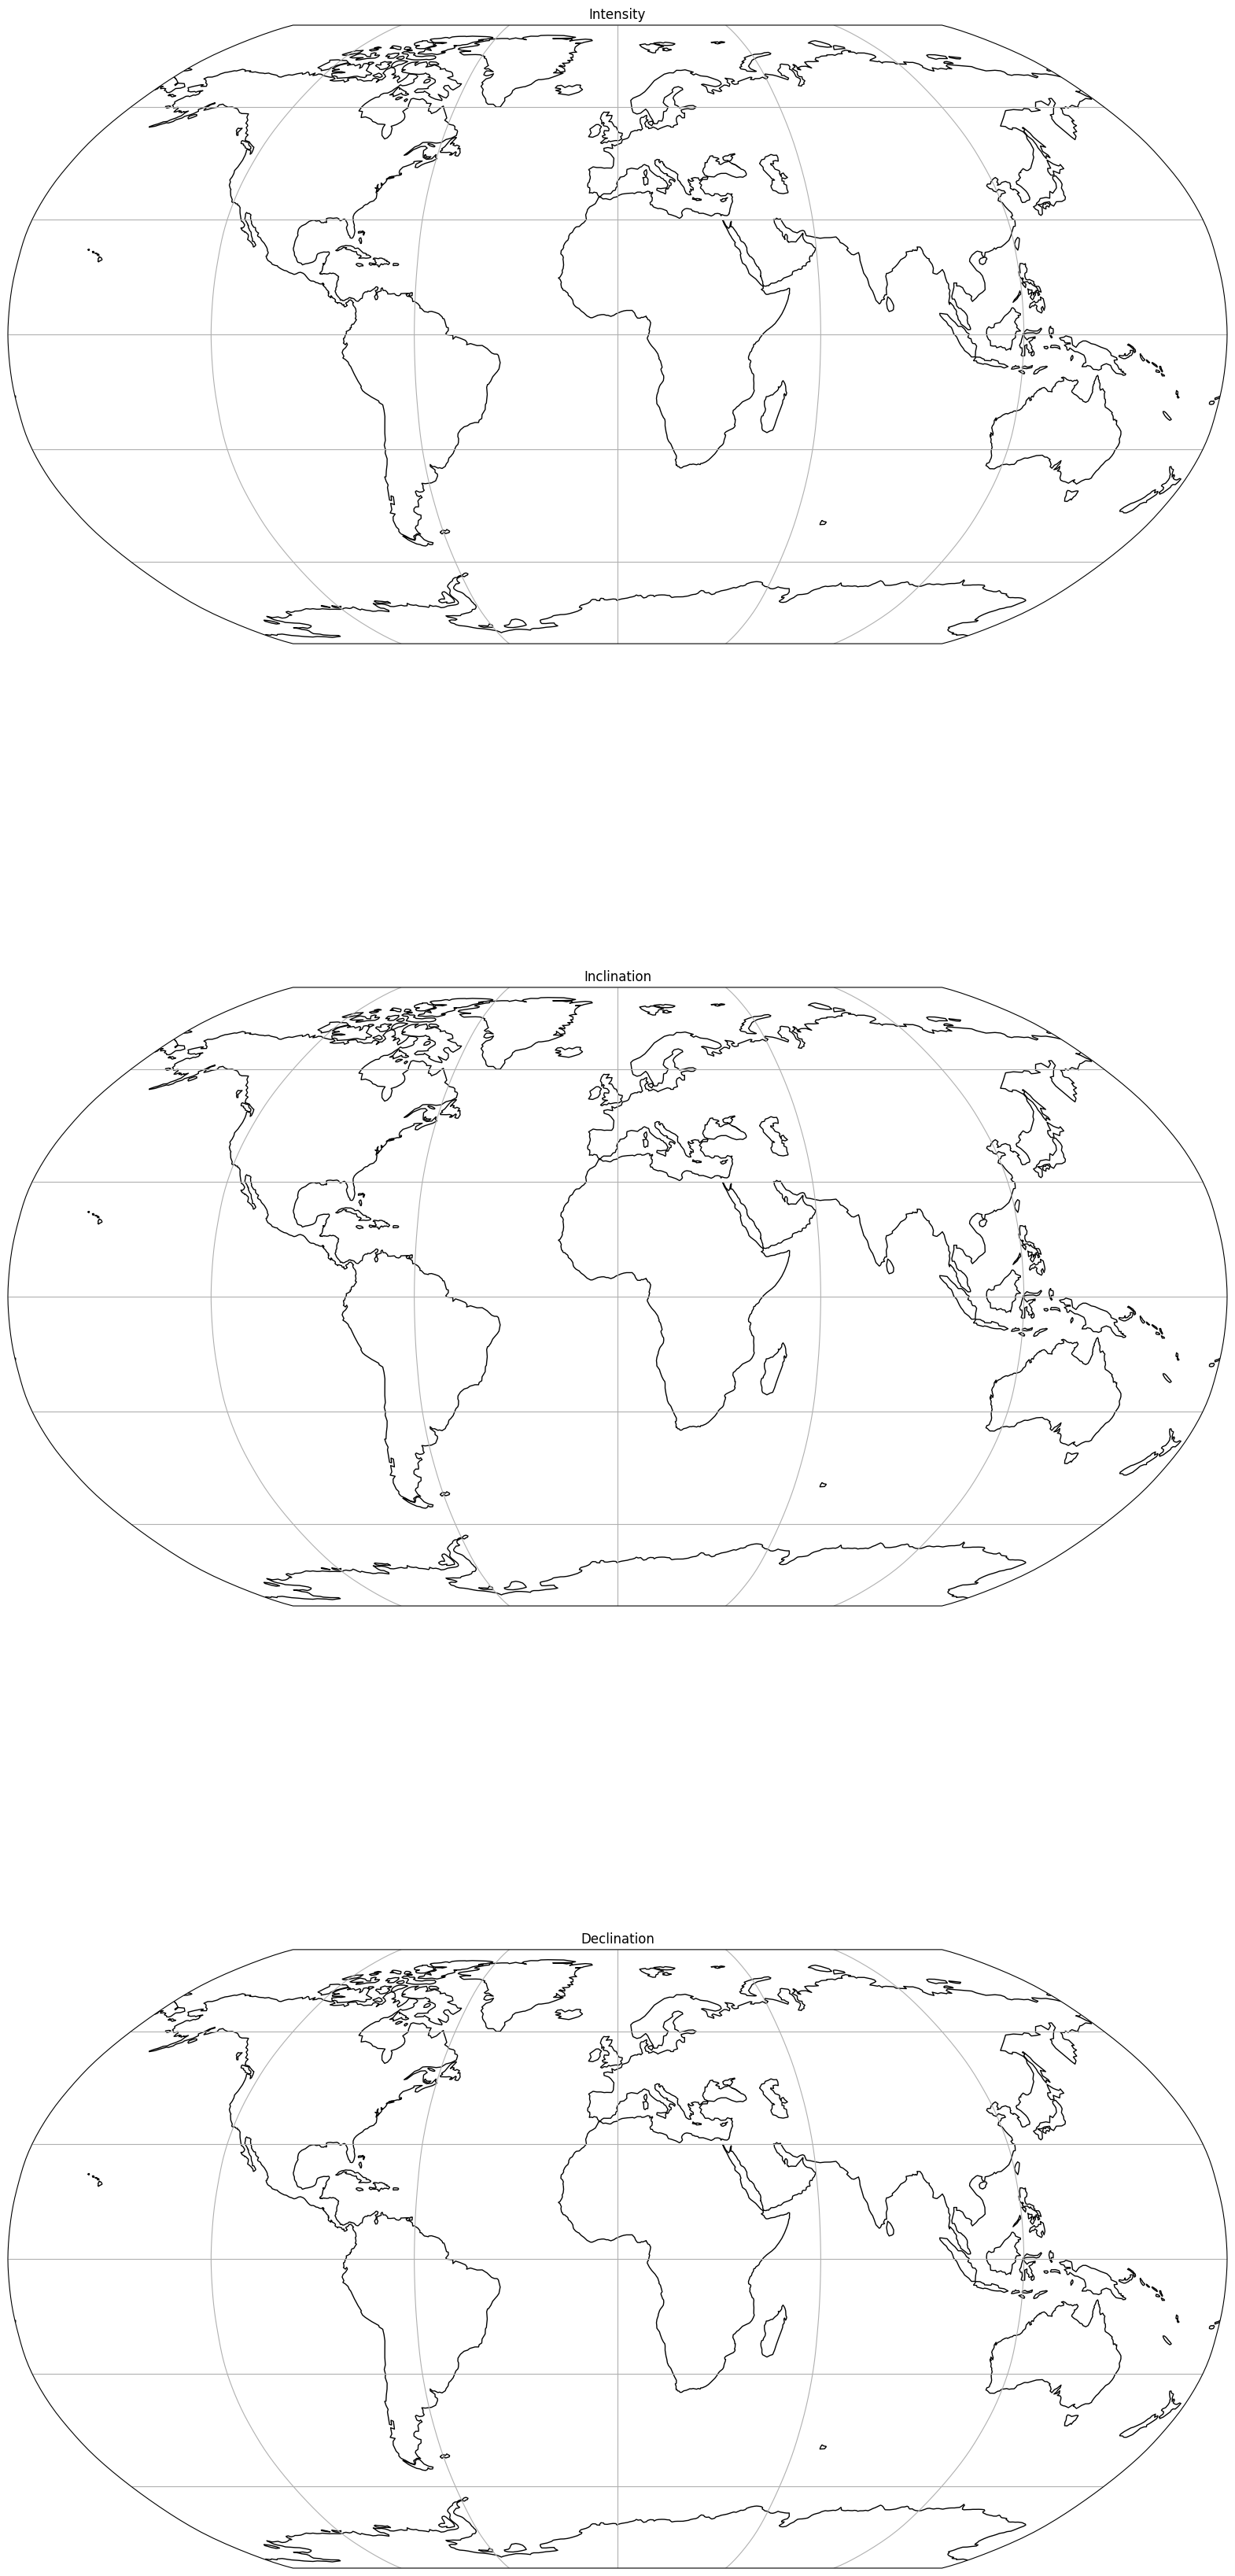

In [80]:
# set three axes and apply a Robinson world projection
fig, axes = plt.subplots(nrows=3, figsize=(20, 45), subplot_kw={'projection': ccrs.Robinson()})
# call the function; input axes and inversion class, but also wished projection, plot time, and optional plotting keywords
axes = plot_tools.plot_world(axes, test_inv, proj=ccrs.PlateCarree(), time=3000)
plt.show()

## 3. Sweeping through models to find optimal damping parameters (optional)
Normally we do not have the optimal damping parameters yet, which is why we will have to search for them **now**. 
We will start a new class and add all our data, then we will sweep through a range of spatial and temporal damping parameters. By plotting model size versus residuals, we will find the best fitting parameters.

In [59]:
# set class and add data
sweep_inv = FieldInversion(time_array = np.linspace(3000, 17000, 141), maxdegree=1)

sweep_inv.add_data(valet_1989)
sweep_inv.add_data(haneda_2020)
sweep_inv.add_data(oda_2000)
sweep_inv.add_data(valet_1988)
sweep_inv.add_data(valet_2014)
sweep_inv.add_data(channell_2000)

#### *sweep_damping*
This method enables us to sweep through the parameters, it needs:
- spatial_range: the range of spatial damping parameters to be tested
- temporal_range: the range of temporal damping parameters to be tested
- x0: starting model of gaussian coefficients

Result can be saved to a folder with the optional dictionary save_kwargs

In [69]:
spatial_range = np.logspace(-15, -10, 1)
temporal_range = np.logspace(13, 14, 5)
x0 = np.zeros(3)
x0[0] = -3

sweep_inv.sweep_damping(x0, spatial_range, temporal_range, basedir= path / 'output', max_iter=30)

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.41s/it]


After performing the calculations, we can plot the results of the damping parameters with `plot_tools.plot_sweep`. The best model would be the model that produces a low residual and a small model size (=norm of the gaussian coefficients).

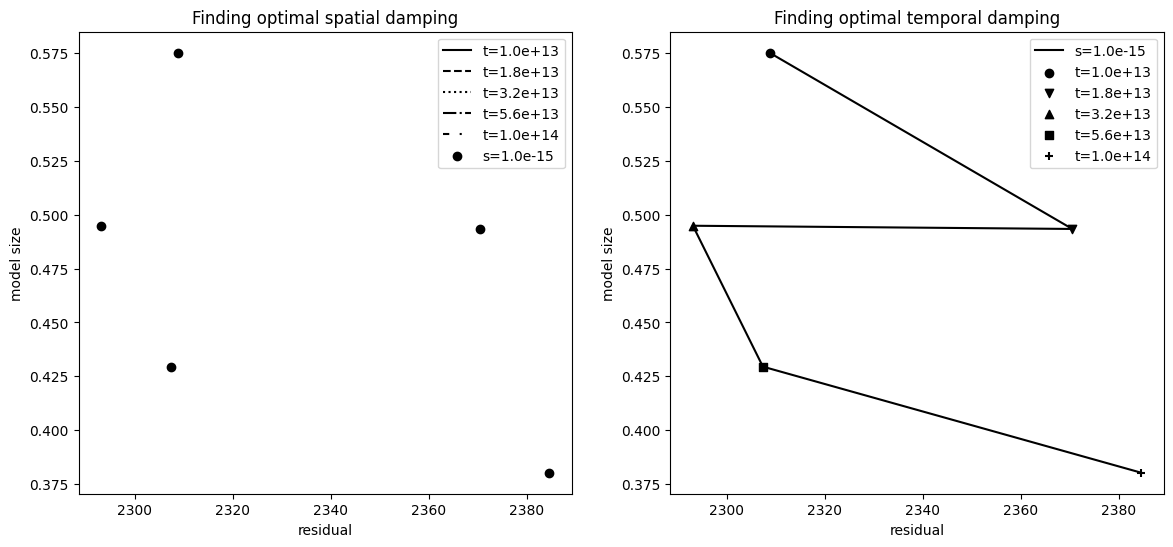

In [70]:
# Now we plot residual vs norm of the model
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].set_title('Finding optimal spatial damping')
axes[1].set_title('Finding optimal temporal damping')
# call function to plot lines
axes = plot_tools.plot_sweep(axes, spatial_range, temporal_range, basedir=path / 'output')
axes[0].legend()
axes[1].legend()
# define colors and a colorbar
plt.show()

#### conclusion
A spatial damping factor of 1e-6 seems to be best; it results in both a low residual and small Gauss coefficients. For the temporal damping factor, it is slightly harder to judge. For now we will assume a temporal damping factor of 1e15. These damping parameters could then be used in the main model (see section 2).

## end of tutorial
This is the end of this tutorial, but we have not covered every detail. If you want to know more about a function, have a look at the code, or type the function with a questionmark after it to get more info (e.g. `plot_tools.plot_spectrum?`). Otherwise you can allways drop an email to Frenk Out at f.out@uu.nl or outfrenk@gmail.com.